# The breakdown of the Phillips Curve

**Motivation for the project and relevans to economics**

This project is our data project where we create a Philips curve from historical data on inflation and employment in the US. In the 1960s the U.S. data showed a good correlation between unemplyment and inflation. However in the 1970s and onwards that relationship disappeared. We found it interesting to recreate the Philips curve from the 1960s with U.S. data but then also look at other periods in time to see if the correlation between inflation and unemployment has actually disappeared - this is not meant as a causal analysis, but just to explore an interesting concept that was widely belived to be true in the economics profession.

# Project setup

In [62]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Getting data from API calls

## Getting FRED data

### Inflation

In [63]:
# A wrapper for multiple APIs with a pandas interface
# Run this in your terminal to use the pandas-datareader: %pip install pandas-datareader

# Importing the pandas_datareader module
import pandas_datareader

# Importing the datetime module
import datetime

# Specifying the timespan you want data from
start = datetime.datetime(1900,1,1)
end = datetime.datetime(2024,1,1)
timespan = end - start # Getting the timespan by subtracting start from end

# Getting inflation data
inflation_us = pandas_datareader.data.DataReader('FPCPITOTLZGUSA', 'fred', start, end)

# Display 10 random elements
inflation_us.sample(10)

,FPCPITOTLZGUSA
DATE,
1990-01-01,5.397956
2017-01-01,2.130110
2002-01-01,1.586032
1986-01-01,1.898048
2009-01-01,-0.355546
1987-01-01,3.664563
2003-01-01,2.270095
1960-01-01,1.457976
2015-01-01,0.118627


#### Descriptive statistics over the inflation data

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

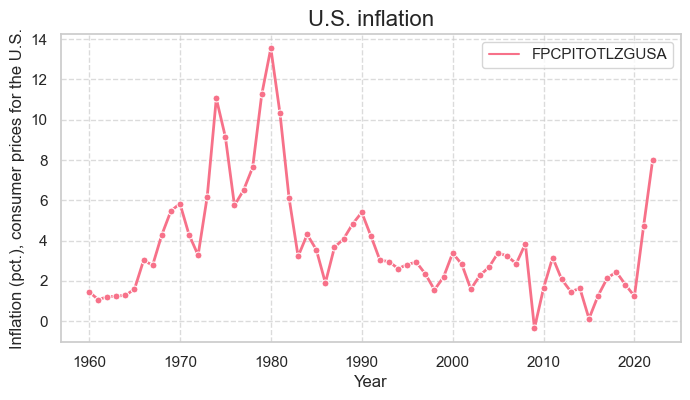

In [64]:
# Suppress FutureWarning about use_inf_as_na
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the graph helper class to reuse the graph generating code
import GraphHelper

# Plot the U.S. inflation data
GraphHelper.pretty_line_plot_US(
    inflation_us, 
    "U.S. inflation", 
    "Year", 
    "Inflation (pct.), consumer prices for the U.S.")

### Unemployment

In [65]:
# Getting unemployment data
unemployment_us_monthly = pandas_datareader.data.DataReader('UNRATE', 'fred', start, end)

# Resample the data to annual frequency
unemployment_us_annual = unemployment_us_monthly.resample('AS', convention='start').asfreq()

# Display 10 random elements
unemployment_us_annual.sample(10)

,UNRATE
DATE,
1987-01-01,6.6
1968-01-01,3.7
1966-01-01,4.0
1951-01-01,3.7
1994-01-01,6.6
2019-01-01,4.0
1989-01-01,5.4
1997-01-01,5.3
2003-01-01,5.8


#### Descriptive statistics over the unemployment data

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

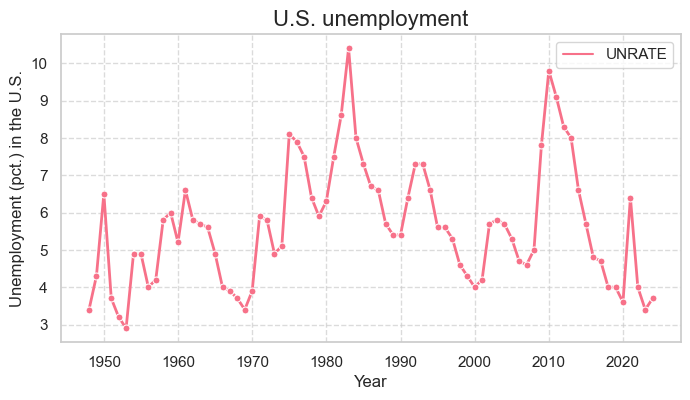

In [66]:
# Plot the U.S. inflation data
GraphHelper.pretty_line_plot_US(
    unemployment_us_annual, 
    "U.S. unemployment", 
    "Year", 
    "Unemployment (pct.) in the U.S.")

## Getting DST data

### Inflation DK

In [67]:
# Importing the datetime module
import datetime

# Importing the DstApi to fetch data from the API
# Run this in your terminal to use the DstAPi: %pip install git+https://github.com/alemartinello/dstapi
from dstapi import DstApi

# Initializing DstApi object
inflation_dk = DstApi('PRIS9')

# Getting an overview over the data
tabsum = inflation_dk.tablesummary(language='en')
display(tabsum)

# Define the parameters for the API call
params = inflation_dk._define_base_params(language='en')
params

# Get the inflation data
inflation_dk_api = inflation_dk.get_data(params=params)

# Set TID as the new index
inflation_dk_api.set_index('TID', inplace=True)

# Rename the index column to YEAR
inflation_dk_api = inflation_dk_api.rename_axis('YEAR')

# Delete the TYPE column
del inflation_dk_api['TYPE']

# Rename INDHOLD column to DK_Inflation
inflation_dk_api = inflation_dk_api.rename(columns={'INDHOLD': 'DK_INFLATION'})

# Delete 1900 because it doesn't have an inflation number
inflation_dk_api = inflation_dk_api.drop(index=1900)

# Convert the column to integer type
inflation_dk_api['DK_INFLATION'] = pd.to_numeric(inflation_dk_api['DK_INFLATION'], errors='coerce')

# Show 10 random elements
inflation_dk_api.sample(10)

Table PRIS9: Consumer price index, annual rate of change by type and time
Last update: 2024-01-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TYPE,1,STIG,Annual rate of change,STIG,Annual rate of change,False
1,Tid,124,1900,1900,2023,2023,True


,DK_INFLATION
YEAR,
1925,-2.8
1959,2.1
1955,6.7
2011,2.8
1992,2.1
1912,3.8
1934,3.9
1963,5.2
1916,17.8


#### Descriptive statistics over the inflation data

<module 'matplotlib.pyplot' from '/Users/victorkristensen/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

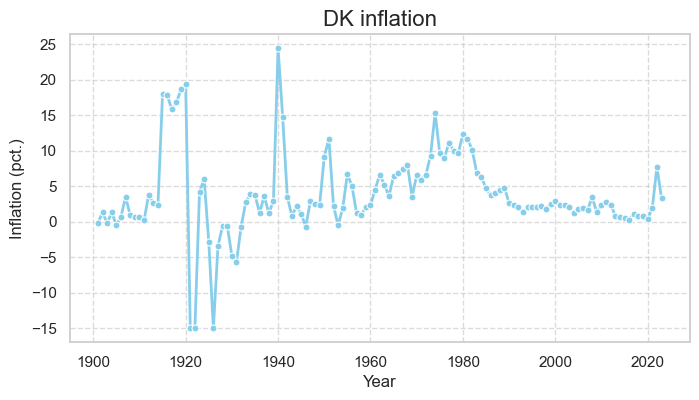

In [68]:
# Plot the U.S. inflation data
GraphHelper.pretty_line_plot_DK(
    inflation_dk_api, 
    "DK inflation", 
    "Year", 
    "Inflation (pct.)",
    "YEAR",
    "DK_INFLATION")

### Unemployment DK


In [69]:
# Initializing DstApi object
unemployment_dk = DstApi('AULAAR')


# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [70]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.